In [2]:
# !pip show tensorflow

# !pip show tensorflow-gpu

# !pip show keras

In [3]:

#import tensorflow as tf
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True, device_count = {'GPU':3}))

In [4]:
#config = tf.ConfigProto(
#        device_count = {'GPU': 0}
#    )
#sess = tf.Session(config=config)

In [5]:
#sess.list_devices()

In [6]:
#import cv2 
import re, sys
import fnmatch, shutil, subprocess
from IPython.utils import io
import glob
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3"
import numpy as np
from keras.models import *
from keras.layers import Input, concatenate, merge, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.losses import binary_crossentropy
import keras.backend as K

#Fix the random seeds for numpy (this is for Keras) and for tensorflow backend to reduce the run-to-run variance
from numpy.random import seed
seed(100)
from tensorflow import set_random_seed
set_random_seed(200)

import matplotlib.pyplot as plt
%matplotlib inline

print("\nSuccessfully imported packages!!!\n")


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



Successfully imported packages!!!



In [7]:
#from keras.utils.training_utils import multi_gpu_model


In [31]:
#Settings
TRAIN_TEST_SPLIT_RATIO = 0.1  # train/test split ratio for Sunnybrook and ACDC data

BASE_DIR = "/opt/output/"
ACDC_SOURCE = "acdc"
SB_SOURCE = 'sunnybrook'
TRAIN_IMG_DIR = BASE_DIR + ACDC_SOURCE + "/norm/1/3/images/"
TRAIN_LBL_DIR = BASE_DIR + ACDC_SOURCE + "/norm/1/3/labels/"

TEST_IMG_DIR = BASE_DIR + ACDC_SOURCE + "/norm/1/3/images/"
PRED_RESULT_DIR = BASE_DIR + ACDC_SOURCE + "/norm/1/3/images/"

# UNET_TRAIN_DIR = BASE_DIR + SOURCE + "/unet_model/data/"
# UNET_MODEL_DIR = BASE_DIR + SOURCE + "/unet_model/models/"

UNET_TRAIN_DIR = "/masvol/heartsmart/unet_model/data/"
UNET_MODEL_DIR = "/masvol/heartsmart/unet_model/models/"

DSB_SOURCE = "dsb"
DSB_TRAIN_IMG_DIR = BASE_DIR + DSB_SOURCE + "/norm/1/3/train"
DSB_VAL_IMG_DIR = BASE_DIR + DSB_SOURCE + "/norm/1/3/validate"
DSB_TEST_IMG_DIR = BASE_DIR + DSB_SOURCE + "/norm/1/3/test"



Mapping ground truth contours to images...
Number of examples: 1808
Shuffle data
/opt/output/acdc/norm/1/3/labels/patient085/patient085_slice12_frame1_label_fix.nii.npy /opt/output/acdc/norm/1/3/labels/patient001/patient001_slice10_frame12_label_fix.nii.npy
Contour 0 : patient085 12 1
Contour -1 : patient001 10 12
Done mapping ground truth contours to images
Split train_set:1628, test_set:180
Extracting Training Images and Labels
Processing 1628 images and labels...
(256, 256) /opt/output/acdc/norm/1/3/images/patient088/patient088_slice14_frame12.nii.npy


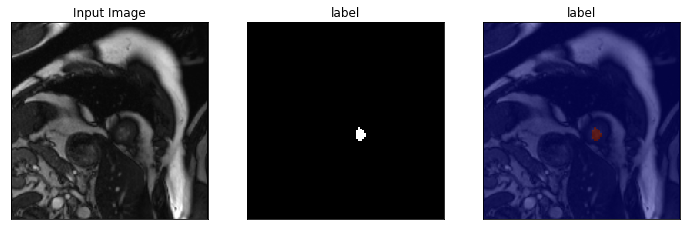

(256, 256) /opt/output/acdc/norm/1/3/images/patient082/patient082_slice2_frame7.nii.npy


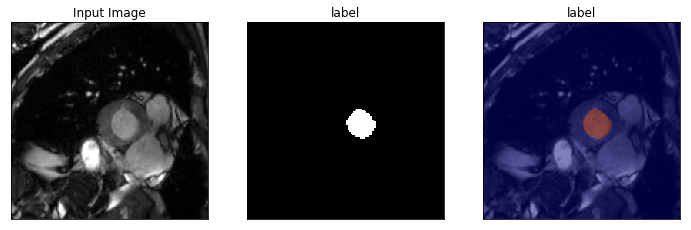

(256, 256) /opt/output/acdc/norm/1/3/images/patient030/patient030_slice3_frame12.nii.npy


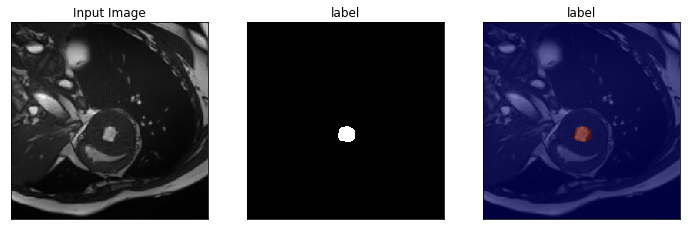

(256, 256) /opt/output/acdc/norm/1/3/images/patient075/patient075_slice6_frame1.nii.npy


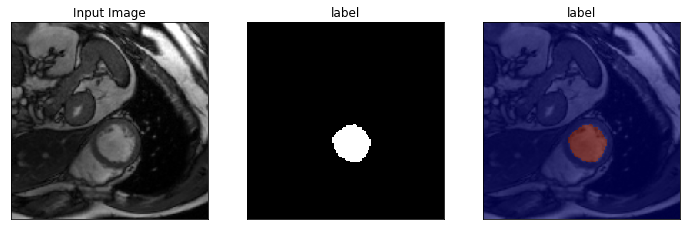

(256, 256) /opt/output/acdc/norm/1/3/images/patient060/patient060_slice9_frame1.nii.npy


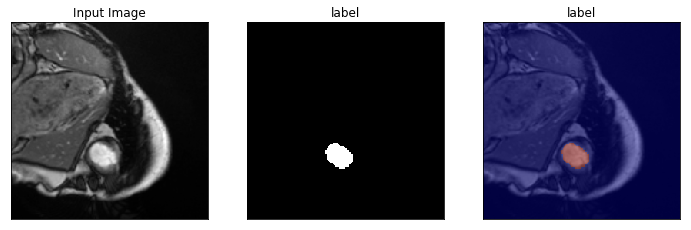

(256, 256) /opt/output/acdc/norm/1/3/images/patient033/patient033_slice4_frame1.nii.npy


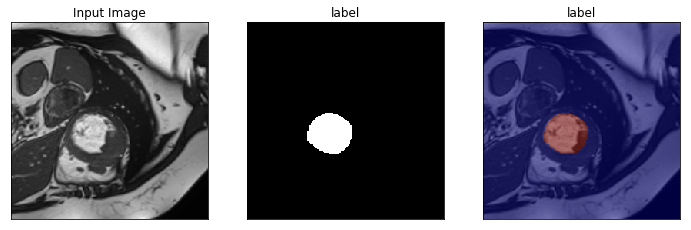

Processed 1628 images and labels...
Extracting Test Images and Labels
Processing 180 images and labels...
(256, 256) /opt/output/acdc/norm/1/3/images/patient085/patient085_slice12_frame1.nii.npy


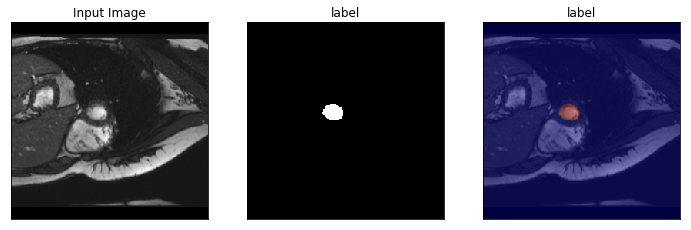

(256, 256) /opt/output/acdc/norm/1/3/images/patient008/patient008_slice9_frame1.nii.npy


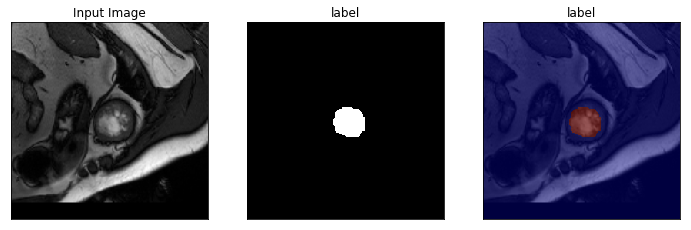

(256, 256) /opt/output/acdc/norm/1/3/images/patient080/patient080_slice3_frame10.nii.npy


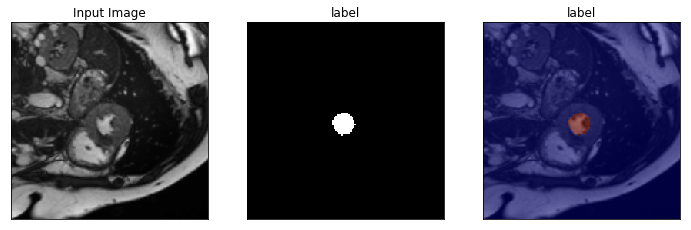

(256, 256) /opt/output/acdc/norm/1/3/images/patient075/patient075_slice4_frame6.nii.npy


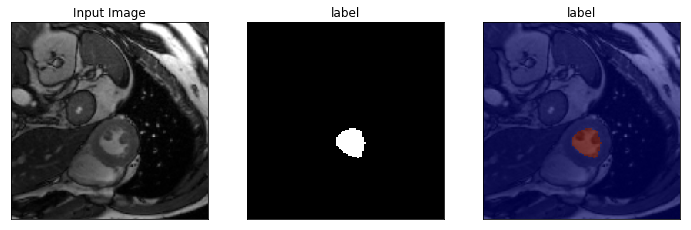

(256, 256) /opt/output/acdc/norm/1/3/images/patient024/patient024_slice3_frame9.nii.npy


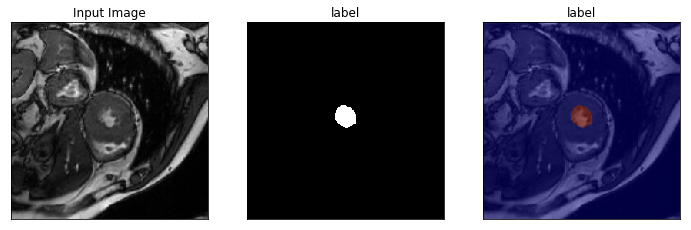

Processed 180 images and labels...
Extracted Images train_set:1628, test_set:180
Mapping ground truth contours to images...
Number of examples: 1808
Shuffle data
/opt/output/acdc/norm/1/3/labels/patient064/patient064_slice9_frame12_label_fix.nii.npy /opt/output/acdc/norm/1/3/labels/patient039/patient039_slice3_frame1_label_fix.nii.npy
Contour 0 : patient064 9 12
Contour -1 : patient039 3 1
Done mapping ground truth contours to images
Split train_set:1628, test_set:180
Extracting Training Images and Labels
Processing 1628 images and labels...
(176, 176) /opt/output/acdc/norm/1/3/images/patient089/patient089_slice5_frame10.nii.npy


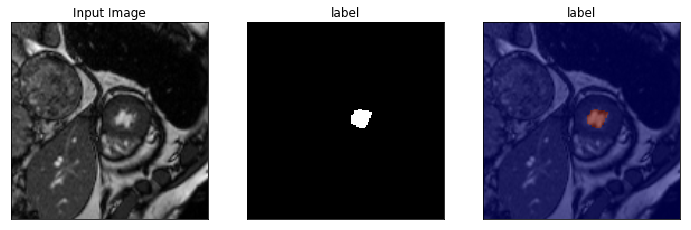

(176, 176) /opt/output/acdc/norm/1/3/images/patient027/patient027_slice10_frame1.nii.npy


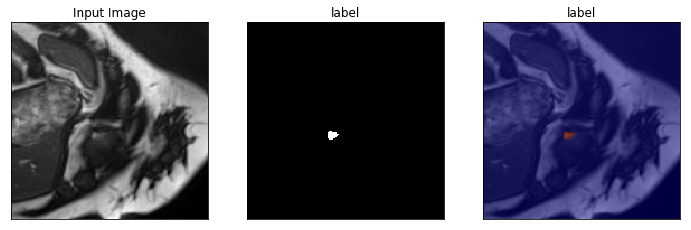

(176, 176) /opt/output/acdc/norm/1/3/images/patient080/patient080_slice2_frame10.nii.npy


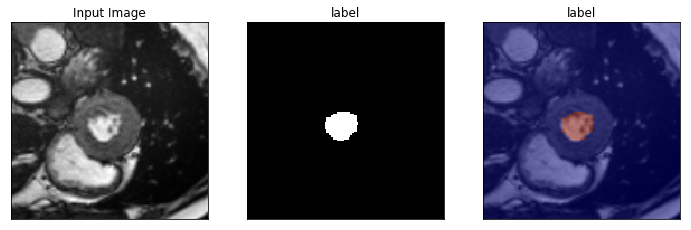

(176, 176) /opt/output/acdc/norm/1/3/images/patient039/patient039_slice2_frame1.nii.npy


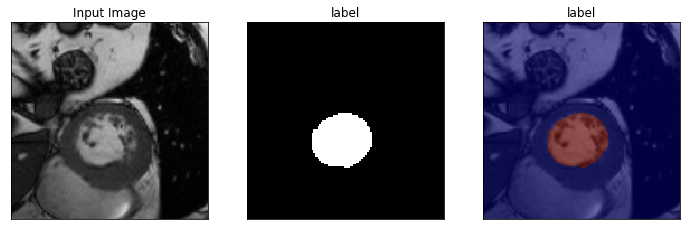

(176, 176) /opt/output/acdc/norm/1/3/images/patient091/patient091_slice2_frame9.nii.npy


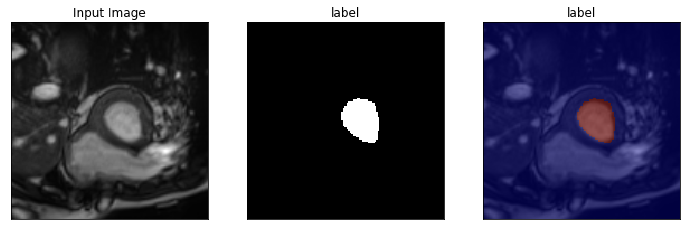

(176, 176) /opt/output/acdc/norm/1/3/images/patient012/patient012_slice7_frame13.nii.npy


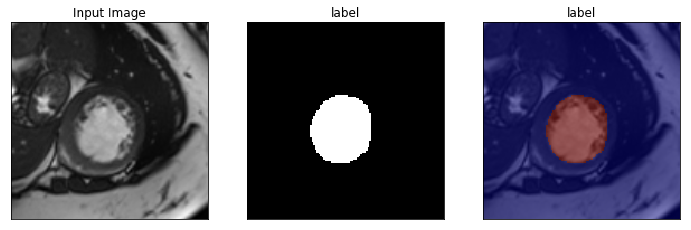

Processed 1628 images and labels...
Extracting Test Images and Labels
Processing 180 images and labels...
(176, 176) /opt/output/acdc/norm/1/3/images/patient064/patient064_slice9_frame12.nii.npy


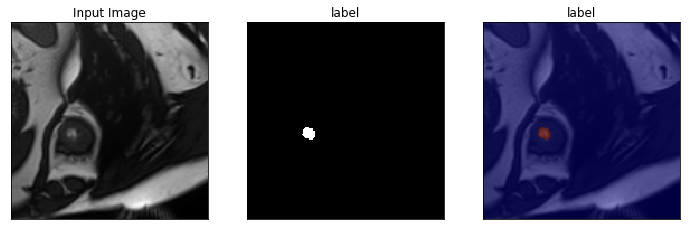

(176, 176) /opt/output/acdc/norm/1/3/images/patient020/patient020_slice8_frame1.nii.npy


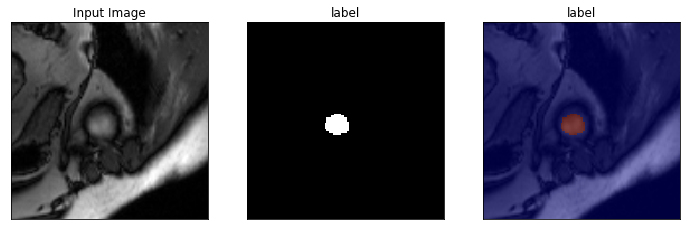

(176, 176) /opt/output/acdc/norm/1/3/images/patient020/patient020_slice5_frame11.nii.npy


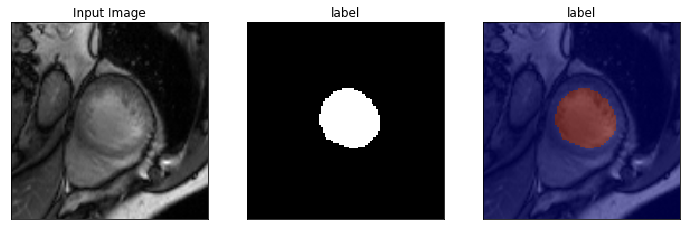

(176, 176) /opt/output/acdc/norm/1/3/images/patient079/patient079_slice7_frame1.nii.npy


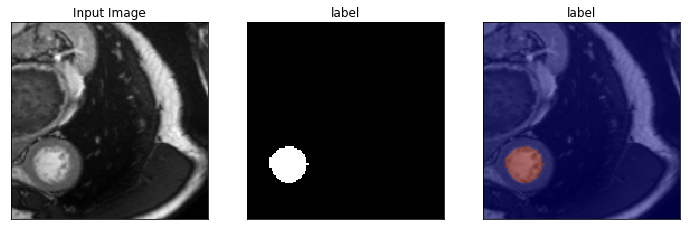

(176, 176) /opt/output/acdc/norm/1/3/images/patient073/patient073_slice4_frame1.nii.npy


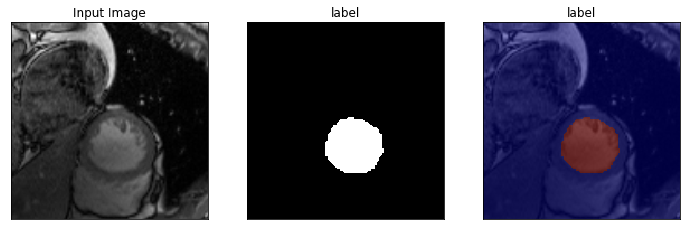

Processed 180 images and labels...
Extracted Images train_set:1628, test_set:180
------------------------------
Creating training data..input size :  1628
------------------------------
Converting data to np array
/masvol/heartsmart/unet_model/data/acdc_1_3_256_train_images.npy
Shape of data & label np arrays :  (1628, 256, 256, 1) (1628, 256, 256, 1)
2952 0 1 0
Saved data as:  /masvol/heartsmart/unet_model/data/acdc_1_3_256_train_images.npy /masvol/heartsmart/unet_model/data/acdc_1_3_256_train_labels.npy
------------------------------
Creating training data..input size :  180
------------------------------
Converting data to np array
/masvol/heartsmart/unet_model/data/acdc_1_3_256_test_images.npy
Shape of data & label np arrays :  (180, 256, 256, 1) (180, 256, 256, 1)
2454 0 1 0
Saved data as:  /masvol/heartsmart/unet_model/data/acdc_1_3_256_test_images.npy /masvol/heartsmart/unet_model/data/acdc_1_3_256_test_labels.npy
------------------------------
Creating training data..input size

In [12]:
##################################
#
# Methods to extract acdc contour files and corresponding image files 
# and Save them as numpy arrays in memory
#
###################################

def save_list(mylist, filename):
    f = open(filename, 'w')
    for item in mylist:
        f.write("%s\n" % item)

def shrink_case(case):
    toks = case.split("-")
    
    def shrink_if_number(x):
        try:
            cvt = int(x)
            return str(cvt)
        except ValueError:
            return x

    return "-".join([shrink_if_number(t) for t in toks])

class Contour(object):
    def __init__(self, ctr_path):
        self.ctr_path = ctr_path
        #print (ctr_path)
        match = re.search(r"/([^/]*)/patient\d+_slice(\d+)_frame(\d+)_label_fix.nii.npy", ctr_path)
        self.case = shrink_case(match.group(1))
        self.record = int(match.group(2))
        self.img_no = int(match.group(3))
    
    def __str__(self):
        return "< Contour for case:%s, record:%d image:%d, path:%s >" % (self.case, self.record, self.img_no, self.ctr_path)
    

def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

def pad_image(img, img_size):
    #print ("input shape : ", img.shape)
    pad_x=0
    pad_y=0
    x,y = img.shape
    if (x<img_size):
        pad_x = img_size - x
    if (y<img_size):
        pad_y = img_size - y
    process_img = np.pad(img, pad_width=((pad_x//2, ((pad_x//2) + (pad_x % 2))), (pad_y//2, ((pad_y//2) + (pad_y % 2)))), mode = 'constant', constant_values = 0)
    #print ("output shape : ", process_img.shape)
    if (x<100 or y<100): 
        print ("too small image",img.shape, pad_x, pad_y, process_img.shape)
    return process_img

def load_contour(contour, img_path, crop_size):
    # file = IM-0851-0127.dcm.npy
    filename = "%s_slice%s_frame%d.nii.npy" % (contour.case,contour.record,contour.img_no)
    full_path = os.path.join(img_path, contour.case, filename)
    img = np.load(full_path)
    label = np.load(contour.ctr_path)
    height, width = img.shape
    height_l, width_l = label.shape
    if height != height_l or width != width_l:
        print ("image and label size do not match ",img.shape, label.shape, full_path )
    if height < crop_size or width < crop_size:
        img = pad_image(img, crop_size)
        label = pad_image(label, crop_size)
    
    if height != crop_size or width != crop_size:
        #print ("img: ", contour.img_no, height, width)
        #print ("lbl: ", height_l, width_l)
        img = crop_center(img,crop_size,crop_size)
        label = crop_center(label,crop_size,crop_size)
        
    return img, label, full_path
   
def get_all_contours(contour_path):
    contours = [os.path.join(dirpath,f) 
            for files in glob.glob(TRAIN_LBL_DIR+"/*") 
            for dirpath, dirname, infiles in os.walk(files) 
            for f in infiles if f.endswith('label_fix.nii.npy')]
    
    print("Number of examples: {:d}".format(len(contours)))
    print("Shuffle data")
    
    np.random.shuffle(contours)
    print (contours[0], contours[-1])
    
    extracted = list(map(Contour, contours))
    print ("Contour 0 :", extracted[0].case, extracted[0].record, extracted[0].img_no)
    print ("Contour -1 :", extracted[-1].case, extracted[-1].record, extracted[-1].img_no) 
    return extracted


def get_contours_and_images(contours, img_path, crop_size):

    num_contours = len(contours)
    print("Processing {:d} images and labels...".format(num_contours))        
    imgs, labels, fpaths = [], [], []
        
    for idx,ctr in enumerate(contours):
        #try:
            filename = "%s_slice%s_frame%d.nii.npy" % (ctr.case,ctr.record,ctr.img_no)
            full_path = os.path.join(img_path, ctr.case, filename)
            img = np.load(full_path)
            x,y = img.shape

            if x < crop_size or y < crop_size:
                img = pad_image(img, crop_size)
                

            img, label, fullpath = load_contour(ctr, img_path, crop_size)
            imgs.append(img)
            labels.append(label)
            fpaths.append(full_path)

            if idx % (num_contours//5) == 0: # print up to 5 images
                print (img.shape, fullpath)
                f, axs = plt.subplots(1,3,figsize=(12,12))
                plt.subplot(131),plt.imshow(img, cmap = 'gray')
                plt.title('Input Image'), plt.xticks([]), plt.yticks([])
                plt.subplot(132),plt.imshow(label, cmap = 'gray')
                plt.title('label'), plt.xticks([]), plt.yticks([])
                plt.subplot(133),plt.imshow(img, cmap = 'gray')
                plt.imshow(label, 'jet', interpolation='none', alpha=0.5)
                plt.title('label'), plt.xticks([]), plt.yticks([])
                plt.show()

    print("Processed {:d} images and labels...".format(len(imgs))) 
    return imgs, labels, fpaths

def save_training_data(imgs, lbls, save_file_path, file_prefix, image_size):
    rows = image_size
    cols = image_size
    i = 0
    print('-'*30)
    print("Creating training data..input size : ",len(imgs))
    print('-'*30)
    print("Converting data to np array")
    
    imgdatas = np.ndarray((len(imgs),rows,cols,1), dtype=np.int)
    
    imglabels = np.ndarray((len(imgs),rows,cols,1), dtype=np.uint8)
    
    for idx in range(len(imgs)):
        img = imgs[idx]
        label = lbls[idx]
        img = img_to_array(img)
        label = img_to_array(label)
        
        try:
            imgdatas[i] = img
            imglabels[i] = label
            i += 1
        except Exception as e:
            print (e)
            continue
        
    imgfile = save_file_path + file_prefix +"_images.npy"
    print (imgfile)
    lblfile = save_file_path + file_prefix +"_labels.npy"
    np.save(imgfile, imgdatas)
    np.save(lblfile, imglabels)

    print ("Shape of data & label np arrays : ", imgdatas.shape, imglabels.shape)
    print (imgdatas.max(), imgdatas.min(), imglabels.max(), imglabels.min())
    print('Saved data as: ', imgfile, lblfile )


def extract_acdc_training_data(crop_size=256): 
    SPLIT_RATIO = TRAIN_TEST_SPLIT_RATIO  # train/test split ratio
    print("Mapping ground truth contours to images...")
    
    ctrs = get_all_contours(TRAIN_LBL_DIR)
    print("Done mapping ground truth contours to images")
    
    test_ctrs = ctrs[0:int(SPLIT_RATIO*len(ctrs))]
    train_ctrs = ctrs[int(SPLIT_RATIO*len(ctrs)):]
    print("Split train_set:%d, test_set:%d"%(len(train_ctrs), len(test_ctrs)))
    
    tr_ctr_file = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_train_contours.txt"
    tst_ctr_file= UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_test_contours.txt"
    save_list(train_ctrs, tr_ctr_file)
    save_list(test_ctrs, tst_ctr_file)
    
    print ("Extracting Training Images and Labels")
    
    train_imgs, train_labels,train_img_paths = get_contours_and_images(train_ctrs, TRAIN_IMG_DIR, crop_size)
    print ("Extracting Test Images and Labels")
    
    test_imgs, test_labels, test_img_paths = get_contours_and_images(test_ctrs, TRAIN_IMG_DIR, crop_size)
    print("Extracted Images train_set:%d, test_set:%d"%(len(train_imgs), len(test_imgs)))
    
    tr_img_file = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_train_images.txt"
    tst_img_file= UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_test_images.txt"
    save_list(train_img_paths, tr_img_file)
    save_list(test_img_paths, tst_img_file)
    
    return train_imgs, train_labels, test_imgs, test_labels 


if __name__ == "__main__":
    ##Get acdc images and labels with crop from center to get 256x256 images
    train_imgs, train_labels, test_imgs, test_labels = extract_acdc_training_data(crop_size=256)

    ##Get acdc images and labels with crop from center to get 176x176 images

    train_imgs2, train_labels2, test_imgs2, test_labels2 = extract_acdc_training_data(crop_size=176)

    ### Create 256x256 size train/test data in 4d tensor shape and save them
    save_location = UNET_TRAIN_DIR
    tr_file_prefix = ACDC_SOURCE + "_1_3_256_train"
    tst_file_prefix = ACDC_SOURCE + "_1_3_256_test"
    save_training_data(train_imgs, train_labels, save_location, tr_file_prefix, image_size = 256)
    save_training_data(test_imgs, test_labels, save_location, tst_file_prefix, image_size = 256)

    ### Create 180x180 size train/test data in 4d tensor shape and save them
    tr_file_prefix = ACDC_SOURCE + "_1_3_176_train"
    tst_file_prefix = ACDC_SOURCE + "_1_3_176_test"

    save_training_data(train_imgs2, train_labels2, save_location, tr_file_prefix, image_size = 176)
    save_training_data(test_imgs2, test_labels2, save_location, tst_file_prefix, image_size = 176)


In [ ]:
acdc_test_data = {}
acdc_test_data["images"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_256_test_images.npy"
acdc_test_data["labels"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_256_test_labels.npy"
acdc_test_img, acdc_test_lbl = load_images_and_labels(acdc_test_data)



In [29]:
#UNET_TRAIN_DIR = "/masvol/heartsmart/unet_model/data/baseline/"

def load_images_and_labels_no_preproc(data):
    print('-'*30)
    print('load np arrays of images and labels...')
    print('-'*30)
    imgfile = data["images"]
    labelfile = data["labels"]
    print ("Loading files : ", imgfile, labelfile)

    images = np.load(imgfile)
    labels = np.load(labelfile)
#     im = np.load(imgfile)
#     lb = np.load(labelfile)
#     images = im.astype('float32')
#     labels = lb.astype('float32')
    
#     ##Normalize the pixel values, (between 0..1)
#     x_min = images.min(axis=(1, 2), keepdims=True)
#     x_max = images.max(axis=(1, 2), keepdims=True)
#     images2 = (images - x_min)/(x_max-x_min)

    print("shape, max, min, mean of original image set:", images.shape, images.max(), images.min(), images.mean())
#    print("shape, max, min, mean after normalization  :", images2.shape, images2.max(), images2.min(), images2.mean())
    print("shape, max, min, mean of labels :", labels.shape, labels.max(), labels.min(), labels.mean())
    return images, labels

def load_images_and_labels(data):
    print('-'*30)
    print('load np arrays of images and labels...')
    print('-'*30)
    imgfile = data["images"]
    labelfile = data["labels"]
    print ("Loading files : ", imgfile, labelfile)
    
    im = np.load(imgfile)
    lb = np.load(labelfile)
    images = im.astype('float32')
    labels = lb.astype('float32')
    
    ##Normalize the pixel values, (between 0..1)
    x_min = images.min(axis=(1, 2), keepdims=True)
    x_max = images.max(axis=(1, 2), keepdims=True)
    images2 = (images - x_min)/(x_max-x_min)

    print("shape, max, min, mean of original image set:", images.shape, images.max(), images.min(), images.mean())
    print("shape, max, min, mean after normalization  :", images2.shape, images2.max(), images2.min(), images2.mean())
    print("shape, max, min, mean of labels :", labels.shape, labels.max(), labels.min(), labels.mean())
    return images2, labels


def load_images(imgfile):
    print('-'*30)
    print('load np arrays of images ...')
    print('-'*30)
    print ("Loading files : ", imgfile)
    
    im = np.load(imgfile)
    images = im.astype('float32')
    
    ##Normalize the pixel values, (between 0..1)
    x_min = images.min(axis=(1, 2), keepdims=True)
    x_max = images.max(axis=(1, 2), keepdims=True)
    images2 = (images - x_min)/(x_max-x_min)

    print("shape, max, min, mean of original image set:", images.shape, images.max(), images.min(), images.mean())
    print("shape, max, min, mean after normalization  :", images2.shape, images2.max(), images2.min(), images2.mean())
    return images2
def combine_acdc_sunnybrook_data_176():
    acdc_train_data = {}
    acdc_train_data["images"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_176_train_images.npy"
    acdc_train_data["labels"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_176_train_labels.npy"

    acdc_train_img, acdc_train_lbl = load_images_and_labels_no_preproc(acdc_train_data)

    acdc_test_data = {}
    acdc_test_data["images"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_176_test_images.npy"
    acdc_test_data["labels"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_176_test_labels.npy"

    acdc_test_img, acdc_test_lbl = load_images_and_labels_no_preproc(acdc_test_data)

    sb_train_data = {}
    sb_train_data["images"] = UNET_TRAIN_DIR + SB_SOURCE + "_1_3_176_train_images.npy"
    sb_train_data["labels"] = UNET_TRAIN_DIR + SB_SOURCE + "_1_3_176_train_labels.npy"
    sb_train_img, sb_train_lbl = load_images_and_labels_no_preproc(sb_train_data)

    sb_test_data = {}
    sb_test_data["images"] = UNET_TRAIN_DIR + SB_SOURCE + "_1_3_176_test_images.npy"
    sb_test_data["labels"] = UNET_TRAIN_DIR + SB_SOURCE + "_1_3_176_test_labels.npy"
    sb_test_img, sb_test_lbl = load_images_and_labels_no_preproc(sb_test_data)

    combined_train_img = np.concatenate((acdc_train_img, sb_train_img), axis=0)
    combined_train_lbl = np.concatenate((acdc_train_lbl, sb_train_lbl), axis=0)

    combined_test_img = np.concatenate((acdc_test_img, sb_test_img), axis=0)
    combined_test_lbl = np.concatenate((acdc_test_lbl, sb_test_lbl), axis=0)
    print (combined_train_img.shape, combined_train_lbl.shape,combined_test_img.shape,combined_test_lbl.shape)
    print ("Saving combined files.......")

    tr_img_file = UNET_TRAIN_DIR + "1_3_combined_176_train_images.npy"
    tr_lbl_file = UNET_TRAIN_DIR + "1_3_combined_176_train_labels.npy"
    tst_img_file = UNET_TRAIN_DIR + "1_3_combined_176_test_images.npy"
    tst_lbl_file = UNET_TRAIN_DIR + "1_3_combined_176_test_labels.npy"

    np.save(tr_img_file, combined_train_img)
    np.save(tr_lbl_file, combined_train_lbl)
    np.save(tst_img_file, combined_test_img)
    np.save(tst_lbl_file, combined_test_lbl)
    
def combine_acdc_sunnybrook_data_256():
    acdc_train_data = {}
    acdc_train_data["images"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_256_train_images.npy"
    acdc_train_data["labels"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_256_train_labels.npy"

    acdc_train_img, acdc_train_lbl = load_images_and_labels_no_preproc(acdc_train_data)

    acdc_test_data = {}
    acdc_test_data["images"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_256_test_images.npy"
    acdc_test_data["labels"] = UNET_TRAIN_DIR + ACDC_SOURCE + "_1_3_256_test_labels.npy"

    acdc_test_img, acdc_test_lbl = load_images_and_labels_no_preproc(acdc_test_data)

    sb_train_data = {}
    sb_train_data["images"] = UNET_TRAIN_DIR + SB_SOURCE + "_1_3_256_train_images.npy"
    sb_train_data["labels"] = UNET_TRAIN_DIR + SB_SOURCE + "_1_3_256_train_labels.npy"
    sb_train_img, sb_train_lbl = load_images_and_labels_no_preproc(sb_train_data)

    sb_test_data = {}
    sb_test_data["images"] = UNET_TRAIN_DIR + SB_SOURCE + "_1_3_256_test_images.npy"
    sb_test_data["labels"] = UNET_TRAIN_DIR + SB_SOURCE + "_1_3_256_test_labels.npy"
    sb_test_img, sb_test_lbl = load_images_and_labels_no_preproc(sb_test_data)

    combined_train_img = np.concatenate((acdc_train_img, sb_train_img), axis=0)
    combined_train_lbl = np.concatenate((acdc_train_lbl, sb_train_lbl), axis=0)

    combined_test_img = np.concatenate((acdc_test_img, sb_test_img), axis=0)
    combined_test_lbl = np.concatenate((acdc_test_lbl, sb_test_lbl), axis=0)
    print (combined_train_img.shape, combined_train_lbl.shape,combined_test_img.shape,combined_test_lbl.shape)
    print ("Saving combined files.......")

    tr_img_file = UNET_TRAIN_DIR + "combined_1_3_256_train_images.npy"
    tr_lbl_file = UNET_TRAIN_DIR + "combined_1_3_256_train_labels.npy"
    tst_img_file = UNET_TRAIN_DIR + "combined_1_3_256_test_images.npy"
    tst_lbl_file = UNET_TRAIN_DIR + "combined_1_3_256_test_labels.npy"

    np.save(tr_img_file, combined_train_img)
    np.save(tr_lbl_file, combined_train_lbl)
    np.save(tst_img_file, combined_test_img)
    np.save(tst_lbl_file, combined_test_lbl)

In [30]:

combine_acdc_sunnybrook_data_176()
#combine_acdc_sunnybrook_data_256()

------------------------------
load np arrays of images and labels...
------------------------------
Loading files :  /masvol/heartsmart/unet_model/data/baseline/acdc_1_3_176_train_images.npy /masvol/heartsmart/unet_model/data/baseline/acdc_1_3_176_train_labels.npy
shape, max, min, mean of original image set: (1628, 176, 176, 1) 2952 0 80.74031383336168
shape, max, min, mean of labels : (1628, 176, 176, 1) 1 0 0.04823723399394887
------------------------------
load np arrays of images and labels...
------------------------------
Loading files :  /masvol/heartsmart/unet_model/data/baseline/acdc_1_3_176_test_images.npy /masvol/heartsmart/unet_model/data/baseline/acdc_1_3_176_test_labels.npy
shape, max, min, mean of original image set: (180, 176, 176, 1) 1104 0 75.97257231404959
shape, max, min, mean of labels : (180, 176, 176, 1) 1 0 0.048124354338842976
------------------------------
load np arrays of images and labels...
------------------------------
Loading files :  /masvol/heartsmar